In [1]:
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import os
import pickle
import pandas as pd
from sklearn.utils import resample
from Functions import clean_split


pd.options.display.max_rows = 35 
pd.options.display.max_columns = None

In [2]:


df = pd.read_csv('data/TweetsOriginal.csv', encoding = 'ISO-8859-1')
x_train, x_test, y_train, y_test = clean_split(2, df)
print(x_train.shape, x_test.shape) 
print(y_train.shape, y_test.shape)

Original Value Counts
1.0    2978
0.0     570
Name: Emotion_New, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Final Resampled Value Counts
1.0    600
0.0    570
Name: Emotion_New, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Finished Pickling
(994, 5000) (176, 5000)
(994,) (176,)


In [3]:
log = LogisticRegression()
log.fit(x_train, y_train) 

print(f'Vanilla Train: {log.score(x_train, y_train)}')
print(f'Vanilla Test: {log.score(x_test, y_test)}')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')



ridge = RidgeClassifier(random_state = 10)
ridge.fit(x_train, y_train) 

print(f'Vanilla Train: {ridge.score(x_train, y_train)}')
print(f'Vanilla Test: {ridge.score(x_test, y_test)}')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


rf = RandomForestClassifier(random_state = 10, n_jobs = -1)
rf.fit(x_train, y_train) 

print(f'Vanilla Train: {rf.score(x_train, y_train)}')
print(f'Vanilla Test: {rf.score(x_test, y_test)}')

Vanilla Train: 0.9788732394366197
Vanilla Test: 0.7272727272727273
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Vanilla Train: 0.993963782696177
Vanilla Test: 0.7386363636363636
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Vanilla Train: 0.9969818913480886
Vanilla Test: 0.7670454545454546


### Resampling
- 0 = negative
- 1 = Positive 
- 2 = neutral

In [3]:
models = {'Log': LogisticRegression(), 'Knn': KNeighborsClassifier(), 
          'DT': DecisionTreeClassifier(random_state = 10), 'Gaussian': GaussianNB(), 'LDA': LinearDiscriminantAnalysis(),
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 
          'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
stack_m = [] 
for model, m in models.items(): 
    stack_m.append((model, m))
stack_model = StackingClassifier(estimators = stack_m, final_estimator = LogisticRegression(), cv = 5)
models['stacked'] = stack_model

#test each model and stacking
results = []
model_names = []
pbar = tqdm(models.items())
for model, m in pbar: 
    pbar.set_description(f'Evaluating {model.upper()}')
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5)
    scores = cross_val_score(m, x_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = 14, 
                             error_score = 'raise')
    results.append(scores)
    model_names.append(model)

Evaluating STACKED: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [09:48<00:00, 49.03s/it]


In [4]:
vanilla_dict = {i:y for i,y in zip(model_names, results)}
pickle.dump(vanilla_dict, open('models/VanillaResults.p', 'wb'))

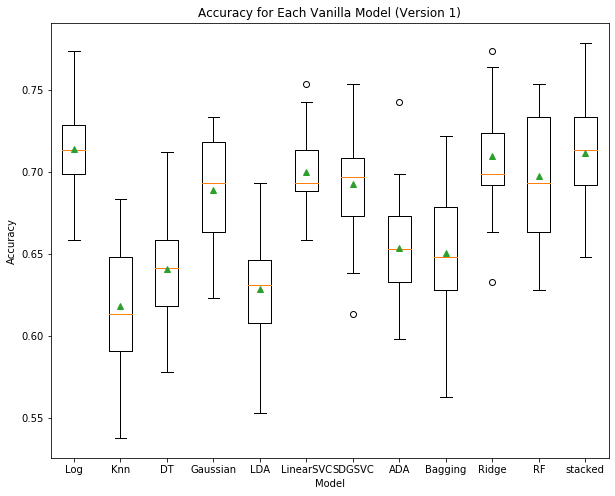

In [5]:
plt.figure(figsize = (10,8))
plt.boxplot(results, labels = model_names, showmeans = True)
plt.title('Accuracy for Each Vanilla Model (Version 1)')
plt.ylabel('Accuracy'); plt.xlabel('Model')
plt.savefig('figures/BaselineAccuracy.png')
plt.show()

In [6]:
models = {'Log': LogisticRegression(), 
          'Gaussian': GaussianNB(), 
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
stack_m = [] 
for model, m in models.items(): 
    stack_m.append((model, m))
stack_model = StackingClassifier(estimators = stack_m, final_estimator = LogisticRegression(), cv = 5)
models['stacked'] = stack_model

#test each model and stacking
results = []
model_names = []
pbar = tqdm(models.items())
for model, m in pbar: 
    pbar.set_description(f'Evaluating {model.upper()}')
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5)
    scores = cross_val_score(m, x_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = 14, 
                             error_score = 'raise')
    results.append(scores)
    model_names.append(model)

Evaluating STACKED: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:52<00:00, 16.07s/it]


In [7]:
vanilla_dict = {i:y for i,y in zip(model_names, results)}
pickle.dump(vanilla_dict, open('models/VanillaResults2.p', 'wb'))

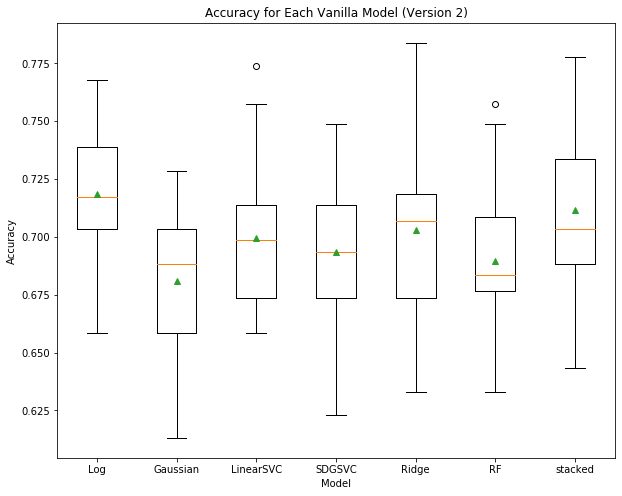

In [8]:
plt.figure(figsize = (10,8))
plt.boxplot(results, labels = model_names, showmeans = True)
plt.title('Accuracy for Each Vanilla Model (Version 2)')
plt.ylabel('Accuracy'); plt.xlabel('Model')
plt.savefig('figures/BaselineAccuracy2.png')
plt.show()

In [ ]:
models = {'Log': LogisticRegression(), 
          'Gaussian': GaussianNB(), 
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'Ridge': RidgeClassifier(random_state = 10), 
          'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
stack_m = [] 
for model, m in models.items(): 
    stack_m.append((model, m))
stack_model = StackingClassifier(estimators = stack_m, final_estimator = LogisticRegression(), cv = 5)
models['stacked'] = stack_model

#test each model and stacking
results = []
model_names = []
pbar = tqdm(models.items())
for model, m in pbar: 
    pbar.set_description(f'Evaluating {model.upper()}')
    cv = RepeatedStratifiedKFold(n_splits = 7, n_repeats = 5)
    scores = cross_val_score(m, x_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = 14, 
                             error_score = 'raise')
    results.append(scores)
    model_names.append(model)

Evaluating STACKED:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 5/6 [01:02<00:16, 16.77s/it]

In [ ]:
vanilla_dict = {i:y for i,y in zip(model_names, results)}
pickle.dump(vanilla_dict, open('models/VanillaResults3.p', 'wb'))

In [ ]:
plt.figure(figsize = (10,8))
plt.boxplot(results, labels = model_names, showmeans = True)
plt.title('Accuracy for Each Vanilla Model (Version 3)')
plt.ylabel('Accuracy'); plt.xlabel('Model')
plt.savefig('figures/BaselineAccuracy2.png')
plt.show()

### Logistic Regression

In [ ]:
log = LogisticRegression()
log.fit(x_train, y_train) 

print(f'Vanilla Train: {log.score(x_train, y_train)}')
print(f'Vanilla Test: {log.score(x_test, y_test)}')

In [11]:
vectorizer = pickle.load(open('../Pickles/Vectorizer.p', 'rb'))

rand_sent = 'i love apple'

new_sent = vectorizer.transform([rand_sent]).toarray()

log.predict_proba(new_sent)

array([[0.98227021, 0.01772979]])